HW #3 complete 13/13

In [291]:
# #HW2 with odeint
# import numpy as np
# from scipy.integrate import odeint
# import matplotlib.pyplot as plt

# tol = 1e-4
# beta_start = 0                                                          # beta should start at 0 and increase or decrease by some db                                   # random db standard i guess
# L = 4
# YL1 = [0,0]                                                             #setting up the initial condition matrix to be edited later
# xshoot = np.linspace(-L, L, num = 81)

# def shoot2(y, x, beta):                                                 # the definition of the converted first order df
#     return [y[1], ((x**2) - beta)*y[0]]

# betaarray = np.array([[]])
# functionarray = np.array([[]])

# for mode in range(1,6):
#     beta = beta_start
#     db = 1
#     for j in range(100):
#         YL1[0] = 1                                                          #initial conditions
#         YL1[1] = np.sqrt(L**2-beta)    
#         p = odeint(shoot2, YL1, xshoot, args=(beta,))
        
#         if abs(p[-1,1] + np.sqrt(L**2-beta)*p[-1,0]) < tol:                  #cehcking convergence
#             betaarray = np.append(betaarray, [beta])
#             break
#         if (-1) ** (mode+1) * (p[-1,1] + np.sqrt(L**2-beta)*p[-1,0]) > 0:       
#             beta = beta + db
#         else:
#             beta = beta - db/2
#             db = db / 2
        
#     beta_start = beta + .1 # picking new beta
#     norm = np.trapz(p[:,0] **2, xshoot)
#     tempfunction = np.abs(p[:,0] / np.sqrt(norm))                           # the absolute value of the eigenfunctions 
#     tempfunction = tempfunction.reshape(-1,1)
#     plt.plot(xshoot, tempfunction)
#     if mode == 1:
#         functionarray = tempfunction
#     else: 
#         functionarray = np.hstack([functionarray, tempfunction])

# A2 = betaarray
# display(A2)
# A1 = functionarray
# display(A2.shape)

array([0.99973579, 2.9990026 , 4.99846306, 6.997581  , 8.99625406])

(5,)


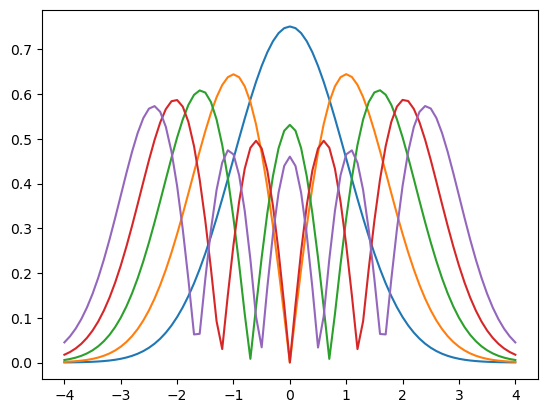

In [292]:
#HW2 with solv_ivp / part a
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

tol = 1e-4
beta_start = 0  # beta should start at 0 and increase or decrease by some db
L = 4
YL1 = [0, 0]  # initial condition matrix
xshoot = np.linspace(-L, L, num=81)

def shoot2(x, y, beta):
    return [y[1], ((x**2) - beta) * y[0]]

betaarray = []
functionarray = []

for mode in range(1, 6):
    beta = beta_start
    db = 1
    for j in range(100):
        YL1[0] = 1  # initial conditions for the shooting method
        YL1[1] = np.sqrt(L**2 - beta)
        
        # Solve the ODE system using solve_ivp
        sol = solve_ivp(shoot2, [-L, L], YL1, args=(beta,), t_eval=xshoot)
        
        # Check for convergence
        if abs(sol.y[1, -1] + np.sqrt(L**2 - beta) * sol.y[0, -1]) < tol:
            betaarray.append(beta)
            break
        if (-1) ** (mode + 1) * (sol.y[1, -1] + np.sqrt(L**2 - beta) * sol.y[0, -1]) > 0:
            beta += db
        else:
            beta -= db / 2
            db /= 2
    
    beta_start = beta + 0.1  # picking new beta for the next mode
    
    # Normalize the solution and store the eigenfunctions
    norm = np.trapz(sol.y[0] ** 2, xshoot)
    tempfunction = np.abs(sol.y[0] / np.sqrt(norm))  # eigenfunction is the absolute value
    tempfunction = tempfunction.reshape(-1, 1)
    plt.plot(xshoot, tempfunction)

    if mode == 1:
        functionarray = tempfunction
    else:
        functionarray = np.hstack([functionarray, tempfunction])

# Display the shapes of the arrays for beta and functions
A2 = np.array(betaarray)
display(A2)
A1 = functionarray
print(A2.shape)

array([[-0.81876667,  0.66666667,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -2.1444    ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        , -2.1369    , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -2.1369    ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -2.1444    ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.66666667, -0.81876667]])

array([0.99937352, 2.996839  , 4.99140656, 6.98038865, 8.95060003])

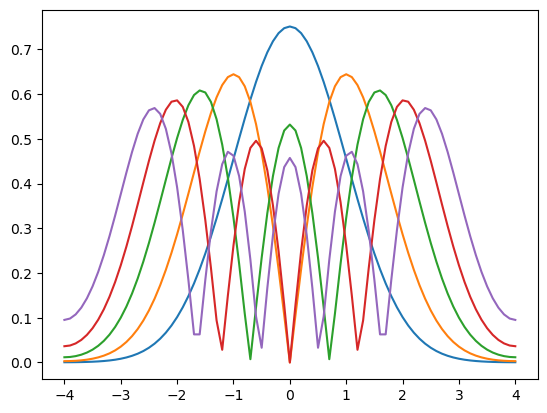

In [309]:
# part b
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

L=4
N=79
x = np.linspace(-L, L, N + 2) 
dx = x[1] - x[0]

A = np.zeros((N, N))
for j in range(N - 1):
    A[j, j + 1] = 1
    A[j + 1, j] = 1
A[0, 0] = 4 / 3               #b/c incorporating the -2 into my P matrix
A[0, 1] = 2 / 3
A[N - 1, N - 1] = 4 / 3       #b/c incorporating the -2 into my P matrix
A[N - 1, N - 2] = 2 / 3

P = np.zeros((N,N))
for j in range(N):
    P[j,j] = -2 - (dx**2) * (x[j+1]**2)
NewA = A+P
#display(NewA)

#direct solve
D,V = eig(-NewA)
D = D / dx**2
sorted_indices = np.argsort(np.abs(D))
Dsort = D[sorted_indices]
Vsort =V[:, sorted_indices]
D5 = Dsort[0:5] 
V5 = Vsort[:,0:5]

display(NewA)

# boundary values 
start = np.array([[]],)
end = np.array([[]])
for j in range(5):
    #start = np.append(start, ((-4*V5[0,j]+V5[1,j])/(-3-(2*dx*np.sqrt((L**2)-D5[j])))))    #this includes the sqrt bit
    start = np.append(start, ((-4*V5[0,j]+V5[1,j])/(-3)))
for j in range (5):
    #end = np.append(end, ((4*V5[len(V5)-1,j]-V5[len(V5)-2,j])/(3+(2*dx*np.sqrt((L**2)-D5[j])))))     #this includes the sqrt bit
    end = np.append(end, ((4*V5[len(V5)-1,j]-V5[len(V5)-2,j])/(3)))
start= np.reshape(start, (1, start.shape[0]))
end = np.reshape(end, (1, end.shape[0]))


# append boundary points to the V5 matrix
V5 = np.append(start, V5, axis = 0)
V5 = np.append(V5, end, axis = 0)
V5 = abs(V5)


#normalization if needed:
for j in range(5):
    norm = np.trapz(V5[:,j] **2, x)
    tempfunction = np.abs(V5[:,j] / np.sqrt(norm))                           # the absolute value of the eigenfunctions 
    tempfunction = tempfunction.reshape(-1,1)
    V5[:,j] = tempfunction[:,0]

A3 = V5.real #shape (81,5)
A4 = D5.real #shape (5,)
#display(A3.shape)
display(A4)

#plotting
for j in range(5):
    plt.plot(x,V5[:,j])

array([1.01293945, 2.92143555, 0.97404785, 2.89309082])

array([1.01293945, 2.92143555])

array([0.97404785, 2.89309082])

1.8849084951708601

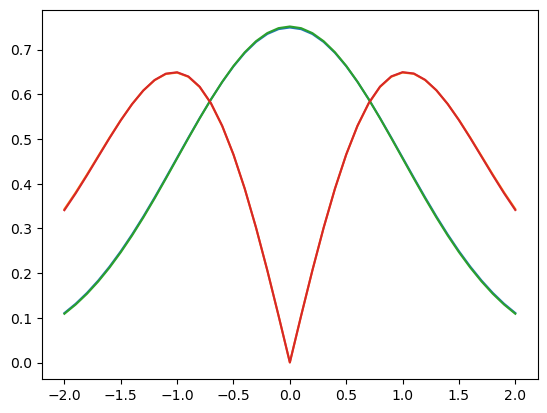

In [328]:
# part c
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

tol = 1e-4
L = 2
xspan = np.linspace(-L, L, 20*L+1)
gamma_values = [0.05, -0.05]
AStart = .1
daStart = .1

def shoot2(x, y, epsilon, gamma):                                                 # the definition of the converted first order df
    return [y[1], (gamma*(np.abs(y[0])**2) + (x**2) - epsilon)*y[0]]

epsarray = np.array([[]])
functionarray = np.array([[]])

for gamma in gamma_values:
    epsilon_start = 0
    for mode in range(1,3):
        A = AStart
        da = daStart
        for k in range(100):
            epsilon = epsilon_start
            de = .1
            for m in range(100):
                YL = [A, np.sqrt(L**2-epsilon)*A]
                sol = solve_ivp(shoot2, (xspan[0], xspan[-1]), YL, args=(epsilon, gamma), t_eval=xspan)

                if abs(sol.y[1,-1] + np.sqrt(L**2-epsilon)*sol.y[0,-1]) < tol:                  #cehcking convergence
                    break
                if (-1) ** (mode+1) * (sol.y[1,-1] + np.sqrt(L**2-epsilon)*sol.y[0,-1]) > 0:       
                    epsilon = epsilon + de
                else:
                    epsilon = epsilon - de/2
                    de = de / 2
                    
            #area = np.trapz(np.abs(sol.y[0]),xspan)       #old area
            area = np.trapz(sol.y[0]**2, xspan)
            if abs(area - 1) < tol:
                #print("yay")
                plt.plot(xspan, np.abs(sol.y[0]))
                #print(epsilon)
                epsarray = np.append(epsarray, [epsilon])
                if functionarray.shape == (1,0):
                    functionarray = np.abs(sol.y[0]).reshape(-1,1)
                else: 
                    functionarray = np.hstack([functionarray, np.abs(sol.y[0]).reshape(-1,1)])                                               
                break
            if area < 1:
                A = A + da
            else:
                A = A - da/2
                da = da/2
        epsilon_start = epsilon + .5           #was .1

display(epsarray)
#normalization if needed:
for j in range(4):
    norm = np.trapz(functionarray[:,j] **2, xspan)
    tempfunction = np.abs(functionarray[:,j] / np.sqrt(norm))                          
    tempfunction = tempfunction.reshape(-1,1)
    functionarray[:,j] = tempfunction[:,0]



A5 = functionarray[:, :2]
A6 = epsarray[0:2]   #shape of A6 is (2,)
display(A6)
A7 = functionarray[:, 2:]
A8 = epsarray[2:]    #shape of A6 is (2,)
display(A8)
display(np.trapz(A5[:,1],xspan))

(4,)

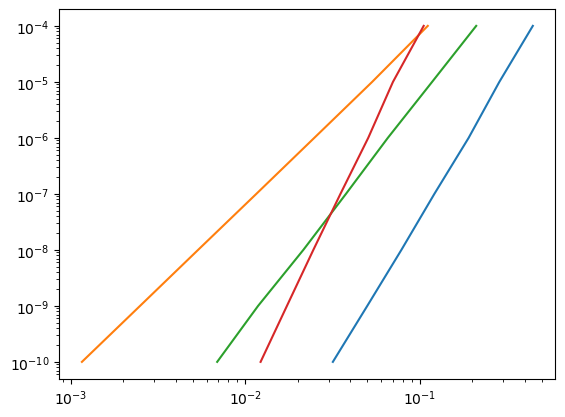

In [295]:
#part d
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

L = 2
xspan = np.linspace(-L, L, 20*L+1)
eps = 1

def shoot2(x, y, eps):
    return [y[1], ((x**2) - eps) * y[0]]

Y0 = [1, np.sqrt(L**2-1)]


TOL = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

step_sizes_RK45 = []
step_sizes_RK23 = []
step_sizes_Radau = []
step_sizes_BDF = []

for t in TOL:
    options = {'rtol': t, 'atol': t}
    
    sol_RK45 = solve_ivp(shoot2, (xspan[0], xspan[-1]), Y0, method= 'RK45', args=(eps,), **options)
    step_sizes_RK45.append(np.diff(sol_RK45.t).mean())
    
    sol_RK23 = solve_ivp(shoot2, (xspan[0], xspan[-1]), Y0, method= 'RK23', args=(eps,), **options)
    step_sizes_RK23.append(np.diff(sol_RK23.t).mean())
    
    sol_Radau = solve_ivp(shoot2, (xspan[0], xspan[-1]), Y0, method= 'Radau', args=(eps,), **options)
    step_sizes_Radau.append(np.diff(sol_Radau.t).mean())
    
    sol_BDF = solve_ivp(shoot2, (xspan[0], xspan[-1]), Y0, method= 'BDF', args=(eps,), **options)
    step_sizes_BDF.append(np.diff(sol_BDF.t).mean())

plt.loglog(step_sizes_RK45, TOL)
plt.loglog(step_sizes_RK23, TOL)
plt.loglog(step_sizes_Radau, TOL)
plt.loglog(step_sizes_BDF, TOL)

def slopey(x,y):
    X = np.log10(x)
    Y = np.log10(y)
    slope, i = np.polyfit(X, Y, 1)
    return slope

slope_RK45 = slopey(step_sizes_RK45, TOL)
slope_RK23 = slopey(step_sizes_RK23, TOL)
slope_Radau = slopey(step_sizes_Radau, TOL)
slope_BDF = slopey(step_sizes_BDF, TOL)

A9 = np.array([slope_RK45, slope_RK23, slope_Radau, slope_BDF])
display(A9.shape)

(5,)

array([0.02642089, 0.03324661, 0.03073889, 0.03455712, 0.04162156])

(5,)

array([0.0626477 , 0.10536673, 0.1718688 , 0.28016214, 0.54888859])

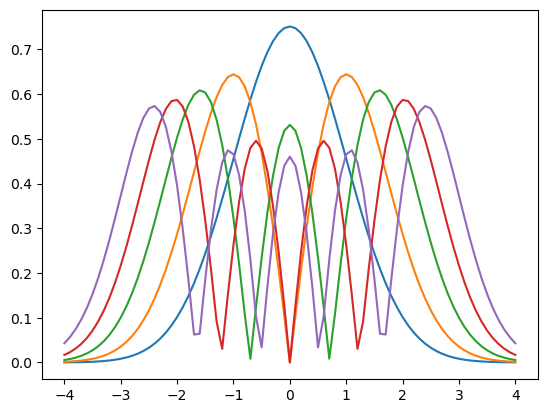

In [305]:
#part e 
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.special import hermite

L = 4

xshoot = np.linspace(-L, L, num=81)
exact_eignvalues = [1,3,5,7,9]

def factorial(n):
   result = 1
   for i in range(1, n + 1):
       result *= i
   return result




exact_eignfunctions = np.zeros((len(xshoot), 5))
for n in range(5):
    Hn = hermite(n)
    gaussian_factor =  np.exp(-xshoot**2/2)
    y_n_unnormalized = Hn(xshoot)*gaussian_factor

    norm_factor = (2**n * factorial(n))**.05
    y_n_normalized = y_n_unnormalized/norm_factor
    
    norm = np.trapz(y_n_normalized**2, xshoot)
    tempfunction = np.abs(y_n_normalized / np.sqrt(norm))
    y_n_normalized = tempfunction

    exact_eignfunctions[:,n] = y_n_normalized
    plt.plot(xshoot, y_n_normalized)

#plt.plot(xshoot, exact_eignfunctions[:,0])
#######################


# x = xshoot
# H0 = np.ones(81)                #n = 0
# H1 = 2*x                        # n = 1
# H2 = 4*x**2-2                   # n = 2
# H3 = 8*x**3 - 12*x              #n = 3
# H4 = 16*x**4 - 48*x**2 + 12     #n= 4
# H5 = 32*x**5 -160*x**3 + 120*x  #n = 5

#could i have made this cleaner ... yes... did i ... no

### y(x) = e^(-x^2/2)*Hn ## -------->  from wikipidia

# Hn = H0
# y1 = np.e**(-(x**2/2))*Hn
# norm = np.trapz(y1 ** 2, xshoot)
# y1 = np.abs(y1 / np.sqrt(norm)) 

# Hn = H1
# y2 = np.e**(-(x**2/2))*Hn
# norm = np.trapz(y2 ** 2, xshoot)
# y2 = np.abs(y2 / np.sqrt(norm)) 

# Hn = H2
# y3 = np.e**(-(x**2/2))*Hn
# norm = np.trapz(y3 ** 2, xshoot)
# y3 = np.abs(y3 / np.sqrt(norm)) 

# Hn = H3
# y4 = np.e**(-(x**2/2))*Hn
# norm = np.trapz(y4 ** 2, xshoot)
# y4 = np.abs(y4 / np.sqrt(norm)) 

# Hn = H4
# y5 = np.e**(-(x**2/2))*Hn
# norm = np.trapz(y5 ** 2, xshoot)
# y5 = np.abs(y5 / np.sqrt(norm)) 

# exact_eignfunctions = np.column_stack((y1, y2, y3, y4, y5))

# for j in range(0,5):
#     plt.plot(xshoot, exact_eignfunctions[:,j])









adiff = np.abs(A1 - exact_eignfunctions)
q = []
for j in range(5):
    q = np.append(q, np.trapz(adiff[:,j]**2, xshoot))
    
##### part a comparison
A10 = q
display(A10.shape)
A11 = 100 * (np.abs(A2 - exact_eignvalues)/exact_eignvalues)
display(A11)







bdiff = np.abs(A3 - exact_eignfunctions)
t = []
for j in range(5):
    t = np.append(t, np.trapz(bdiff[:,j]**2, xshoot))
    
##### part b comparison
A12 = t
display(A12.shape)
A13 = 100 * (np.abs(A4 - exact_eignvalues)/exact_eignvalues)
display(A13)






